# SAT & ACT Data Exploration and Analysis
## Maximizing Participation Rates for the College Board

### Problem Statement
For this project, we're going to take a look at aggregate SAT and ACT scores and participation rates from each state in the United States. We'll seek to identify trends in the data and combine our data analysis with outside research to identify likely factors influencing participation rates and scores in various states. 

Sample prompt:
"The new format for the SAT was released in March 2016. As an employee of the College Board - the organization that administers the SAT - you are a part of a team that tracks statewide participation and recommends where money is best spent to improve SAT participation rates. Your presentation and report should be geared toward non-technical executives with the College Board and you will use the provided data and outside research to make recommendations about how the College Board might work to increase the participation rate in a state of your choice."

### Executive Summary

The College Board faces certain challenges when it comes to increasing participation rates across staes. Noteably, some states mandate and/or freely provide the alternative ACT, which can deter students from taking the SAT altogether. To combat this, the College Board can work with these states' Board of Education to shift their policies, as they did with Colorado and Illinois. Otherwise, they can focus on engaging states with relatively low SAT participation rates, where there is no such imposed requirement, such as Georgia, Oregon, and California, by making the SAT more accessible to students in a variety of ways. When SAT participation rates in these states rise, they might notice a decline in average total scores. 

### Contents:
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization and Descriptions](#Visualizing-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

## Data Import and Cleaning
The crucial first step for any data exploration and analysis.

#### 1. Reading in SAT & ACT Data

In [3]:
#Code:
sat_2017 = pd.read_csv("../data/sat_2017.csv")
act_2017 = pd.read_csv("../data/act_2017.csv")
sat_2018 = pd.read_csv("../data/sat_2018.csv")
act_2018 = pd.read_csv("../data/act_2018.csv")

#### 2. Displaying the first few rows of our data

In [4]:
sat_2017.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055


In [5]:
act_2017.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4


In [6]:
sat_2018.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


In [7]:
act_2018.head()

,State,Participation,Composite
0,National,55%,20.8
1,Alabama,100%,19.1
2,Alaska,33%,20.8
3,Arizona,66%,19.2
4,Arkansas,100%,19.4


#### 3. Description of data

 - The four imported datasets represent the statewide averages and participation rates for both the SAT and ACT in 2017 & 2018.  
 - The 2018 ACT dataset does not include average scores for individual subjects tested, but only the composite scores.  
 - When compared to provided sources, ([SAT 2017](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/), [SAT 2018](https://reports.collegeboard.org/sat-suite-program-results/state-results), [ACT 2017](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows), [ACT 2018](http://www.act.org/content/dam/act/unsecured/documents/cccr2018/Average-Scores-by-State.pdf)) we notice that errors are indeed present in our data and need to be corrected.  

#### 4. Fixing errors
- Correcting individual cells that differ from provided data source.

In [8]:
#Maryland SAT 2017 math score inputted incorrectly
sat_2017.at[20, 'Math']= 524

#Wyoming ACT 2017 Composite score has an extraneous 'x' character
act_2017.at[51, 'Composite'] = 20.2

#Marlyand ACT Math score inputted incorrectly
act_2017.at[21, 'Science'] = 23.2

#Mississippi spelled incorrectly
sat_2018.at[24, 'State'] = 'Mississippi'

#Oklahoma spelled incorrectly
sat_2018.at[36, 'State'] = 'Oklahoma'

#### 5. Displaying data types for each dataset 


In [9]:
sat_2017.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [10]:
act_2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

In [11]:
sat_2018.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [12]:
act_2018.dtypes

State             object
Participation     object
Composite        float64
dtype: object

Participation rates need to be converted to be a `float` type .  
ACT Composite score should also be of type `float`.

#### 6. Fixing Incorrect Data Types
- Using `map` and `apply` to change necessary columns in each dataframe.

In [13]:
#function to remove '%' character and convert to decimal between 0 and 1
#used a try statement to avoid errors when rerunning this cell
def make_pct(n):
    try:
        return float(n.rstrip('%'))/100
    except:
        return n
sat_2017['Participation'] = sat_2017['Participation'].apply(make_pct)
act_2017['Participation'] = act_2017['Participation'].apply(make_pct)
sat_2018['Participation'] = sat_2018['Participation'].apply(make_pct)
act_2018['Participation'] = act_2018['Participation'].apply(make_pct)


In [14]:
#changing datatype of ACT 2017 Composite column to float
act_2017['Composite'] = act_2017['Composite'].map(lambda x : float(x))

- Redisplaying datatypes to ensure that all data types are now correct:

In [15]:
sat_2017.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

In [16]:
act_2017.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

In [17]:
sat_2018.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

In [18]:
act_2018.dtypes

State             object
Participation    float64
Composite        float64
dtype: object

#### 7. Dropping unnecessary rows

- ACT datasets include a row for "National" scores, which doesn't apply to our state-by-state comparisons.

In [19]:
act_2017.drop([0])
act_2018.drop([0]);

#### 8. Renaming Columns
- The next step involves renaming the columns to be more expressive and simplify the process of combining data for our final dataset. 

In [20]:
sat_2017.rename(columns={'State': 'state', 
                         'Participation' : 'sat_2017_part',
                         'Evidence-Based Reading and Writing' : 'sat_2017_erw', 
                         'Math' : 'sat_2017_math',
                         'Total' : 'sat_2017_total'
                        }, inplace=True)

act_2017.rename(columns={'State': 'state', 
                         'Participation' : 'act_2017_part',
                         'English' : 'act_2017_english', 
                         'Math': 'act_2017_math',
                         'Reading' : 'act_2017_reading',
                         'Science' : 'act_2017_science',
                         'Composite' : 'act_2017_composite'
                        }, inplace=True)

sat_2018.rename(columns={'State': 'state', 
                         'Participation' : 'sat_2018_part',
                         'Evidence-Based Reading and Writing' : 'sat_2018_erw', 
                         'Math' : 'sat_2018_math',
                         'Total' : 'sat_2018_total'
                        }, inplace=True)

act_2018.rename(columns={'State': 'state', 
                         'Participation' : 'act_2018_part',
                         'Composite' : 'act_2018_composite'
                        }, inplace=True)

#### 9. Merging Dataframes

- Joining the all ACT and SAT dataframes and assigning this new dataframe to a variable named `final`.

In [21]:
final = sat_2017.merge(act_2018, on='state', how='inner').merge(sat_2018).merge(act_2017) #default arguments work perfectly

- Displaying the first and last rows of our final dataframe:

In [22]:
final.head()

,state,sat_2017_part,sat_2017_erw,sat_2017_math,sat_2017_total,act_2018_part,act_2018_composite,sat_2018_part,sat_2018_erw,sat_2018_math,sat_2018_total,act_2017_part,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite
0,Alabama,0.05,593,572,1165,1.00,19.1,0.06,595,571,1166,1.00,18.9,18.4,19.7,19.4,19.2
1,Alaska,0.38,547,533,1080,0.33,20.8,0.43,562,544,1106,0.65,18.7,19.8,20.4,19.9,19.8
2,Arizona,0.30,563,553,1116,0.66,19.2,0.29,577,572,1149,0.62,18.6,19.8,20.1,19.8,19.7
3,Arkansas,0.03,614,594,1208,1.00,19.4,0.05,592,576,1169,1.00,18.9,19.0,19.7,19.5,19.4
4,California,0.53,531,524,1055,0.27,22.7,0.60,540,536,1076,0.31,22.5,22.7,23.1,22.2,22.8


In [23]:
final.tail()

,state,sat_2017_part,sat_2017_erw,sat_2017_math,sat_2017_total,act_2018_part,act_2018_composite,sat_2018_part,sat_2018_erw,sat_2018_math,sat_2018_total,act_2017_part,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite
45,Virginia,0.65,561,541,1102,0.24,23.9,0.68,567,550,1117,0.29,23.5,23.3,24.6,23.5,23.8
46,Washington,0.64,541,534,1075,0.24,22.2,0.69,543,538,1081,0.29,20.9,21.9,22.1,22.0,21.9
47,West Virginia,0.14,558,528,1086,0.65,20.3,0.28,513,486,999,0.69,20.0,19.4,21.2,20.5,20.4
48,Wisconsin,0.03,642,649,1291,1.00,20.5,0.03,641,653,1294,1.00,19.7,20.4,20.6,20.9,20.5
49,Wyoming,0.03,626,604,1230,1.00,20.0,0.03,633,625,1257,1.00,19.4,19.8,20.8,20.6,20.2


#### 10. Saving the cleaned, merged dataframe

- Using a relative path to save out data as `final.csv`.

In [24]:
final.to_csv('../data/final.csv')

## Exploratory Data Analysis
Now that we've scrubbed our data squeaky clean, we can start exploring!

### Summary Statistics
- Using pandas `describe` method to create a quick overview of each numeric feature:

In [25]:
final.describe().T

,count,mean,std,min,25%,50%,75%,max
sat_2017_part,50.0,0.3860,0.345602,0.02,0.0400,0.34,0.6500,1.0
sat_2017_erw,50.0,570.8600,44.385146,503.00,535.2500,559.50,613.5000,644.0
sat_2017_math,50.0,558.6600,45.839832,492.00,524.0000,549.50,601.0000,651.0
sat_2017_total,50.0,1129.6200,89.913085,996.00,1057.0000,1107.50,1214.0000,1295.0
act_2018_part,50.0,0.6224,0.341602,0.07,0.2775,0.66,1.0000,1.0
act_2018_composite,50.0,21.4560,2.117580,17.70,19.9250,21.05,23.6500,25.6
sat_2018_part,50.0,0.4572,0.378380,0.02,0.0425,0.50,0.7825,1.0
sat_2018_erw,50.0,568.7000,44.640171,505.00,536.2500,553.00,617.2500,643.0
sat_2018_math,50.0,558.8000,48.109569,486.00,522.2500,547.00,603.2500,655.0
sat_2018_total,50.0,1127.5800,92.373485,998.00,1063.2500,1099.00,1225.0000,1298.0


#### Manually calculating standard deviation
Based on the following formula:
$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$  

In [26]:
#a function to calculate standard deviation 
def stdev(n):
    m = sum(n)/len(n) #find mean
    a = 1/len(n) #1/n
    b = 0 #initialize summation
    for i in n:
        b += (i - m)**2
    return np.sqrt(a*b) #return squareroot of product

In [27]:
# Assigning the output to variable `sd` using dictionary comprehension where: 
#     - Each column name is now a key 
#     - That standard deviation of the column is the value 
sd = {key: stdev(value) for (key,value) in final.iloc[:,1:].items()} #exclude first column 'states'
sd

{'sat_2017_part': 0.3421286307808805,
 'sat_2017_erw': 43.93905324423821,
 'sat_2017_math': 45.37911854586864,
 'sat_2017_total': 89.00941298536914,
 'act_2018_part': 0.33816895185690826,
 'act_2018_composite': 2.096297688783728,
 'sat_2018_part': 0.3745773084424629,
 'sat_2018_erw': 44.1915150226828,
 'sat_2018_math': 47.62604329565915,
 'sat_2018_total': 91.44508516043933,
 'act_2017_part': 0.3178794740149165,
 'act_2017_english': 2.3009467616613812,
 'act_2017_math': 1.9541504548012678,
 'act_2017_reading': 2.025750231395766,
 'act_2017_science': 1.7145553359399048,
 'act_2017_composite': 1.9840977798485642}

- Our manually calculated standard deviations differ from those found in the output of panda's `describe()` method because the formula above is for the standard deviation of the **population** while `describe()` outputs a standard deviation caluculated for a **sample**, (using Bessel's correction). Whereas, the numpy `std()` function *does* use the above formula to calculate standard deviation.

## Investigating trends in the data
- Implementing sorting and masking (along with the `.head` and `.tail` methods to not print our entire dataframe) we use the following outputs to address questions regarding the data:

#### 1. Which states have the highest and lowest participation rates for the 2017 SAT?

In [28]:
#output head() and tail()
#including related columns in order to see the bigger picture/notice any trends
final[['state','sat_2017_part','sat_2018_part', 
       'act_2017_part','act_2018_part']].sort_values('sat_2017_part').head()


,state,sat_2017_part,sat_2018_part,act_2017_part,act_2018_part
33,North Dakota,0.02,0.02,0.98,0.98
23,Mississippi,0.02,0.03,1.00,1.00
14,Iowa,0.02,0.03,0.67,0.68
24,Missouri,0.03,0.04,1.00,1.00
43,Utah,0.03,0.04,1.00,1.00


In [29]:
final[['state','sat_2017_part','sat_2018_part', 
       'act_2017_part','act_2018_part']].sort_values('sat_2017_part').tail()

,state,sat_2017_part,sat_2018_part,act_2017_part,act_2018_part
18,Maine,0.95,0.99,0.08,0.07
28,New Hampshire,0.96,0.96,0.18,0.16
21,Michigan,1.00,1.00,0.29,0.22
7,Delaware,1.00,1.00,0.18,0.17
6,Connecticut,1.00,1.00,0.31,0.26


 - Connecticut, Delaware, and Michigan have 100% participation rates for the 2017 SAT.  
 - North Dakota, Mississippi, and Iowara share the lowest participation rates at 2%.

#### 2. Which states have the highest and lowest participation rates for the 2018 SAT?

In [31]:
final[['state','sat_2017_part','sat_2018_part', 
       'act_2017_part','act_2018_part']].sort_values('sat_2018_part').head(10)

,state,sat_2017_part,sat_2018_part,act_2017_part,act_2018_part
33,North Dakota,0.02,0.02,0.98,0.98
49,Wyoming,0.03,0.03,1.00,1.00
40,South Dakota,0.03,0.03,0.80,0.77
26,Nebraska,0.03,0.03,0.84,1.00
48,Wisconsin,0.03,0.03,1.00,1.00
23,Mississippi,0.02,0.03,1.00,1.00
14,Iowa,0.02,0.03,0.67,0.68
43,Utah,0.03,0.04,1.00,1.00
22,Minnesota,0.03,0.04,1.00,0.99
17,Louisiana,0.04,0.04,1.00,1.00


In [31]:
final[['state','sat_2017_part','sat_2018_part', 
       'act_2017_part','act_2018_part']].sort_values('sat_2018_part').tail(10)

,state,sat_2017_part,sat_2018_part,act_2017_part,act_2018_part
28,New Hampshire,0.96,0.96,0.18,0.16
8,Florida,0.83,0.97,0.73,0.66
38,Rhode Island,0.71,0.97,0.21,0.15
12,Illinois,0.09,0.99,0.93,0.43
18,Maine,0.95,0.99,0.08,0.07
21,Michigan,1.00,1.00,0.29,0.22
7,Delaware,1.00,1.00,0.18,0.17
6,Connecticut,1.00,1.00,0.31,0.26
5,Colorado,0.11,1.00,1.00,0.30
11,Idaho,0.93,1.00,0.38,0.36


 - Colorado and Idaho join Connecticut, Delaware, and Michigan for a 100% participation rate for the 2018 SAT.  
 - North Dakota remains at the bottom with a 2% participation rate. 

#### 3. Which states have the highest and lowest participation rates for the 2017 ACT?

In [32]:
final[['state','sat_2017_part','sat_2018_part', 
       'act_2017_part','act_2018_part']].sort_values('act_2017_part').head()

,state,sat_2017_part,sat_2018_part,act_2017_part,act_2018_part
18,Maine,0.95,0.99,0.08,0.07
7,Delaware,1.00,1.00,0.18,0.17
28,New Hampshire,0.96,0.96,0.18,0.16
38,Rhode Island,0.71,0.97,0.21,0.15
37,Pennsylvania,0.65,0.70,0.23,0.20


In [33]:
final[['state','sat_2017_part','sat_2018_part', 
       'act_2017_part','act_2018_part']].sort_values('act_2017_part').tail(20)

,state,sat_2017_part,sat_2018_part,act_2017_part,act_2018_part
10,Hawaii,0.55,0.56,0.90,0.89
12,Illinois,0.09,0.99,0.93,0.43
33,North Dakota,0.02,0.02,0.98,0.98
39,South Carolina,0.50,0.55,1.00,1.00
43,Utah,0.03,0.04,1.00,1.00
41,Tennessee,0.05,0.06,1.00,1.00
0,Alabama,0.05,0.06,1.00,1.00
24,Missouri,0.03,0.04,1.00,1.00
32,North Carolina,0.49,0.52,1.00,1.00
27,Nevada,0.26,0.23,1.00,1.00


 - There are 17 states that share a 100% participation rate.  
 - Maine has the lowest 2017 ACT participation rate at 8%.  

#### 4. Which states have the highest and lowest participation rates for the 2018 ACT?

In [34]:
final[['state','sat_2017_part','sat_2018_part', 
       'act_2017_part','act_2018_part']].sort_values('act_2018_part').head()

,state,sat_2017_part,sat_2018_part,act_2017_part,act_2018_part
18,Maine,0.95,0.99,0.08,0.07
38,Rhode Island,0.71,0.97,0.21,0.15
28,New Hampshire,0.96,0.96,0.18,0.16
7,Delaware,1.00,1.00,0.18,0.17
37,Pennsylvania,0.65,0.70,0.23,0.20


In [35]:
final[['state','sat_2017_part','sat_2018_part', 
       'act_2017_part','act_2018_part']].sort_values('act_2018_part').tail(20)

,state,sat_2017_part,sat_2018_part,act_2017_part,act_2018_part
10,Hawaii,0.55,0.56,0.90,0.89
33,North Dakota,0.02,0.02,0.98,0.98
22,Minnesota,0.03,0.04,1.00,0.99
43,Utah,0.03,0.04,1.00,1.00
41,Tennessee,0.05,0.06,1.00,1.00
39,South Carolina,0.50,0.55,1.00,1.00
0,Alabama,0.05,0.06,1.00,1.00
24,Missouri,0.03,0.04,1.00,1.00
34,Ohio,0.12,0.18,0.75,1.00
32,North Carolina,0.49,0.52,1.00,1.00


 - Though there are still 17 states with 100% participation rate for 2018 ACT, some of those states have changed--Ohio and Nevada replacing Colorado and Minnesota.  
 - Maine maintains the lowest spot at 7% participation rate. 

#### 5. Do any states with 100% participation on a given test have a rate change year-to-year?


 - Notably, Colorado went from an 11% SAT participation rate in 2017 to 100% in 2018.  
 - Illinois had a similar change from 9% to 99%.  

 - Nebraska and Ohio had a 100% 2018 ACT participation rate, from 84% and 75% in 2017, respectively.

#### 6. Which states have the highest and lowest mean total/composite scores for the 2017 SAT?

In [36]:
final[['state', 'sat_2017_total','sat_2018_total',
       'act_2017_composite', 'act_2018_composite']].sort_values('sat_2017_total').head()

,state,sat_2017_total,sat_2018_total,act_2017_composite,act_2018_composite
7,Delaware,996,998,24.1,23.8
11,Idaho,1005,1001,22.3,22.3
21,Michigan,1005,1011,24.1,24.4
18,Maine,1012,1013,24.3,24.0
8,Florida,1017,1014,19.8,19.9


In [37]:
final[['state', 'sat_2017_total','sat_2018_total',
       'act_2017_composite', 'act_2018_composite']].sort_values('sat_2017_total').tail()

,state,sat_2017_total,sat_2018_total,act_2017_composite,act_2018_composite
15,Kansas,1260,1264,21.7,21.6
24,Missouri,1271,1262,20.4,20.0
14,Iowa,1275,1265,21.9,21.8
48,Wisconsin,1291,1294,20.5,20.5
22,Minnesota,1295,1298,21.5,21.3


 - Kansas has the highest average total score for the 2017 SAT.  
 - Delaware has the lowest. 

#### 7. Which states have the highest and lowest mean total/composite scores for the 2018 SAT?

In [38]:
final[['state', 'sat_2017_total','sat_2018_total',
       'act_2017_composite', 'act_2018_composite']].sort_values('sat_2018_total').head()

,state,sat_2017_total,sat_2018_total,act_2017_composite,act_2018_composite
7,Delaware,996,998,24.1,23.8
47,West Virginia,1086,999,20.4,20.3
11,Idaho,1005,1001,22.3,22.3
21,Michigan,1005,1011,24.1,24.4
18,Maine,1012,1013,24.3,24.0


In [39]:
final[['state', 'sat_2017_total','sat_2018_total',
       'act_2017_composite', 'act_2018_composite']].sort_values('sat_2018_total').tail()

,state,sat_2017_total,sat_2018_total,act_2017_composite,act_2018_composite
15,Kansas,1260,1264,21.7,21.6
14,Iowa,1275,1265,21.9,21.8
33,North Dakota,1256,1283,20.3,20.3
48,Wisconsin,1291,1294,20.5,20.5
22,Minnesota,1295,1298,21.5,21.3


 - For the 2018 SAT, Minnesota claims the highest average total score.  
 - Delaware remains at the lowest. 

#### 8. Which states have the highest and lowest mean total/composite scores for the 2017 ACT?

In [40]:
final[['state', 'sat_2017_total','sat_2018_total',
       'act_2017_composite', 'act_2018_composite']].sort_values('act_2017_composite').head()

,state,sat_2017_total,sat_2018_total,act_2017_composite,act_2018_composite
27,Nevada,1116,1140,17.8,17.7
23,Mississippi,1242,1236,18.6,18.6
39,South Carolina,1064,1070,18.7,18.3
10,Hawaii,1085,1099,19.0,18.9
32,North Carolina,1081,1097,19.1,19.1


In [41]:
final[['state', 'sat_2017_total','sat_2018_total',
       'act_2017_composite', 'act_2018_composite']].sort_values('act_2017_composite').tail()

,state,sat_2017_total,sat_2018_total,act_2017_composite,act_2018_composite
31,New York,1052,1068,24.2,24.5
18,Maine,1012,1013,24.3,24.0
6,Connecticut,1041,1053,25.2,25.6
20,Massachusetts,1107,1125,25.4,25.5
28,New Hampshire,1052,1063,25.5,25.1


 - New Hampshire has the highest 2017 ACT Composite Score.  
 - Nevada has the lowest.

#### 9. Which states have the highest and lowest mean total/composite scores for the 2018 ACT?

In [42]:
final[['state', 'sat_2017_total','sat_2018_total',
       'act_2017_composite', 'act_2018_composite']].sort_values('act_2018_composite').head()

,state,sat_2017_total,sat_2018_total,act_2017_composite,act_2018_composite
27,Nevada,1116,1140,17.8,17.7
39,South Carolina,1064,1070,18.7,18.3
23,Mississippi,1242,1236,18.6,18.6
10,Hawaii,1085,1099,19.0,18.9
0,Alabama,1165,1166,19.2,19.1


In [43]:
final[['state', 'sat_2017_total','sat_2018_total',
       'act_2017_composite', 'act_2018_composite']].sort_values('act_2018_composite').tail()

,state,sat_2017_total,sat_2018_total,act_2017_composite,act_2018_composite
21,Michigan,1005,1011,24.1,24.4
31,New York,1052,1068,24.2,24.5
28,New Hampshire,1052,1063,25.5,25.1
20,Massachusetts,1107,1125,25.4,25.5
6,Connecticut,1041,1053,25.2,25.6


 - In 2018, Connecticut has the highest ACT composite score.
 - Nevada remains at the lowest. 

#### 10. Do any states show have >50% participation on *both* tests either year?

In [44]:
final[['state','sat_2017_part','sat_2018_part', 
       'act_2017_part','act_2018_part']][(final['sat_2017_part'] >= .5) & (final['act_2017_part'] >= .5)]

,state,sat_2017_part,sat_2018_part,act_2017_part,act_2018_part
8,Florida,0.83,0.97,0.73,0.66
9,Georgia,0.61,0.70,0.55,0.53
10,Hawaii,0.55,0.56,0.90,0.89
39,South Carolina,0.50,0.55,1.00,1.00


In [45]:
final[['state','sat_2017_part','sat_2018_part', 
       'act_2017_part','act_2018_part']][(final['sat_2018_part'] >= .5) & (final['act_2018_part'] >= .5)]

,state,sat_2017_part,sat_2018_part,act_2017_part,act_2018_part
8,Florida,0.83,0.97,0.73,0.66
9,Georgia,0.61,0.70,0.55,0.53
10,Hawaii,0.55,0.56,0.90,0.89
32,North Carolina,0.49,0.52,1.00,1.00
39,South Carolina,0.50,0.55,1.00,1.00


 - Florida, Georgia, Hawaii, South Carolina have over 50% participation for both SAT and ACT in 2017.  
 - North Carolina joins them in 2018. (But they were just shy at 49% for the 2017 SAT).

## Visualizing the Data
We continue with our exploration by charting various data in hopes to reveal some trends.  


 - Using Seaborn's heatmap with pandas `.corr()` to visualize correlations between relative numeric features:

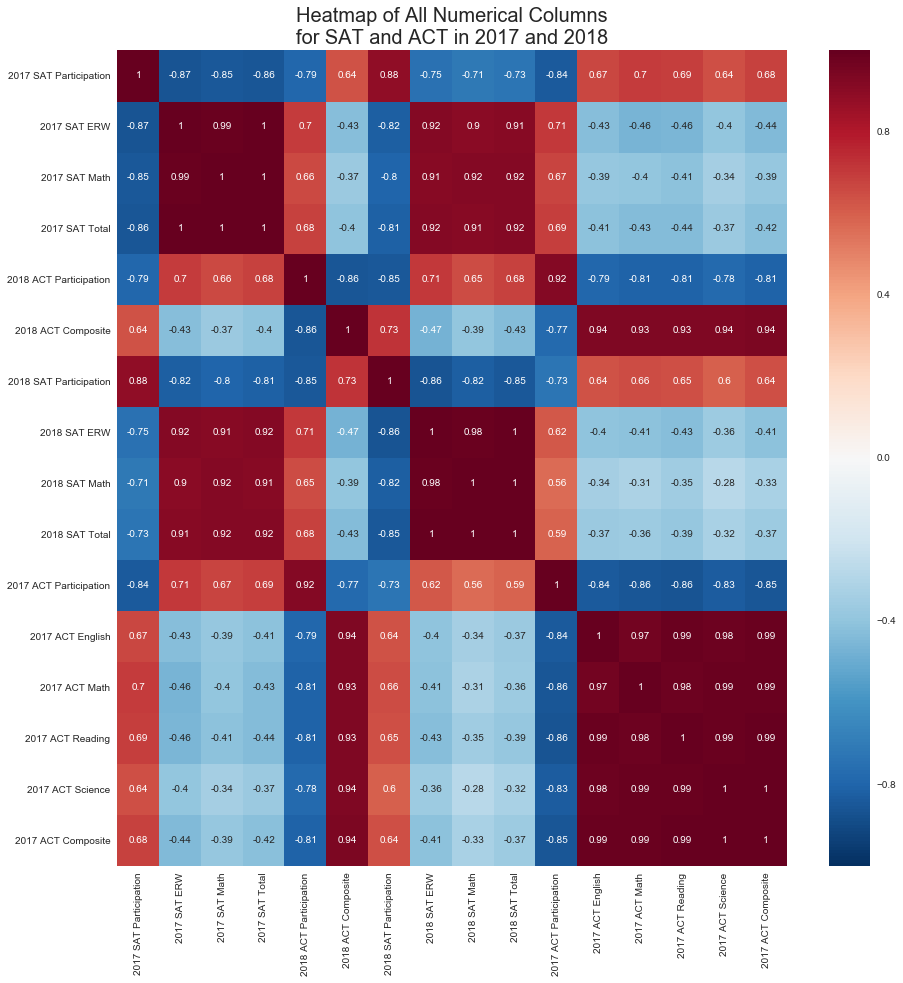

In [46]:
sns.set_style("whitegrid")
plt.figure(figsize = (15,15))
sns.heatmap(final[['sat_2017_part', 'sat_2017_erw', 'sat_2017_math',
                   'sat_2017_total', 'act_2018_part', 'act_2018_composite',
                   'sat_2018_part', 'sat_2018_erw', 'sat_2018_math', 'sat_2018_total',
                   'act_2017_part', 'act_2017_english', 'act_2017_math',
                   'act_2017_reading', 'act_2017_science', 'act_2017_composite']].corr(), 
            annot=True, 
            xticklabels = ['2017 SAT Participation', '2017 SAT ERW', '2017 SAT Math',
                   '2017 SAT Total', '2018 ACT Participation', '2018 ACT Composite',
                   '2018 SAT Participation', '2018 SAT ERW', '2018 SAT Math', '2018 SAT Total',
                   '2017 ACT Participation', '2017 ACT English', '2017 ACT Math',
                   '2017 ACT Reading', '2017 ACT Science', '2017 ACT Composite'],
            yticklabels = ['2017 SAT Participation', '2017 SAT ERW', '2017 SAT Math',
                   '2017 SAT Total', '2018 ACT Participation', '2018 ACT Composite',
                   '2018 SAT Participation', '2018 SAT ERW', '2018 SAT Math', '2018 SAT Total',
                   '2017 ACT Participation', '2017 ACT English', '2017 ACT Math',
                   '2017 ACT Reading', '2017 ACT Science', '2017 ACT Composite'])
plt.title("Heatmap of All Numerical Columns\nfor SAT and ACT in 2017 and 2018", fontsize = 20);


 - This heatmap provides a good idea of where to look for correlation or collinearity regarding scores and participation rates.

#### A Custom function to subplot histograms:

In [47]:
# (Starter code provided by initial prompt)
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, 
                           figsize = (15,len(list_of_columns)*2.5)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    fig.subplots_adjust(hspace=.45)
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].set_title(list_of_titles[i], fontsize = 15)
        ax[i].hist(dataframe[column], rwidth= .75) 
        ax[i].set_xlabel(list_of_xlabels[i], fontsize = 12)# feel free to add more settings
        # Set titles, labels, etc here for each subplot

### Participation Rates for SAT & ACT:

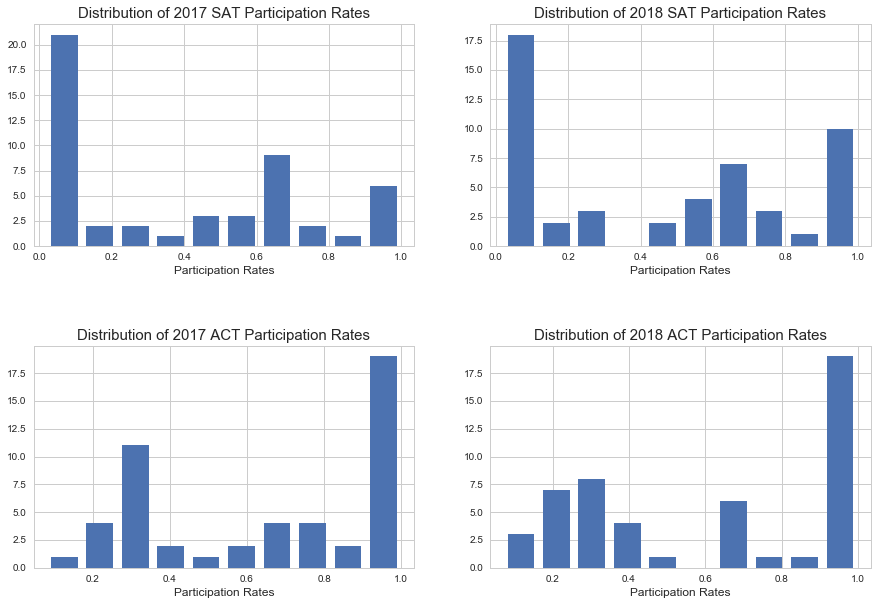

In [48]:
subplot_histograms(final, ['sat_2017_part', 'sat_2018_part', 'act_2017_part','act_2018_part'], 
                   ['Distribution of 2017 SAT Participation Rates',
                    'Distribution of 2018 SAT Participation Rates', 
                    'Distribution of 2017 ACT Participation Rates',
                    'Distribution of 2018 ACT Participation Rates'], 
                   ['Participation Rates','Participation Rates',
                    'Participation Rates', 'Participation Rates'])

 - We note high volumes on either extremes (<10% or >90%) for SAT and ACT participation rates.  
 - Let's take a closer look at the relationship in the following scatterplot:

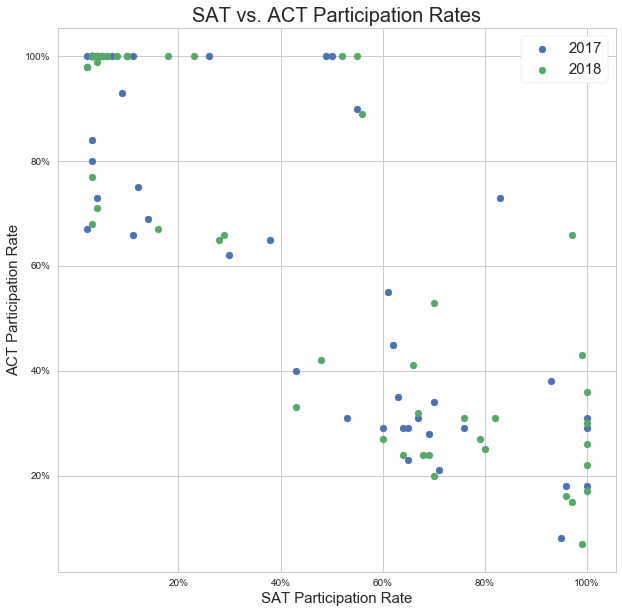

In [49]:
plt.figure(figsize = (10,10))
plt.scatter(final['sat_2017_part'],final['act_2017_part'], label='2017')
plt.scatter(final['sat_2018_part'],final['act_2018_part'], label='2018');
plt.xlabel('SAT Participation Rate', fontsize = 15)
plt.xticks(ticks = [.2,.4,.6,.8,1.0],labels = ['20%', '40%', '60%', '80%', '100%'], fontsize = 10)
plt.ylabel('ACT Participation Rate', fontsize = 15)
plt.yticks(ticks = [.2,.4,.6,.8,1.0],labels = ['20%', '40%', '60%', '80%', '100%'], fontsize = 10)
plt.legend(loc='upper right', prop={'size': 15},framealpha=1, frameon=True, facecolor= 'white')
plt.title("SAT vs. ACT Participation Rates", fontsize = 20);


 - We observe a negative correlation between SAT and ACT participation rates: States that have high participation rates for one test, are likely to have a low participation rate in the other.
 - Some states have 100% participation in either test, but none have 100% in both

### Comparing SAT and ACT Subject and Total/Composite Scores in 2017
- Distribution of Math Scores for SAT & ACT in 2017:

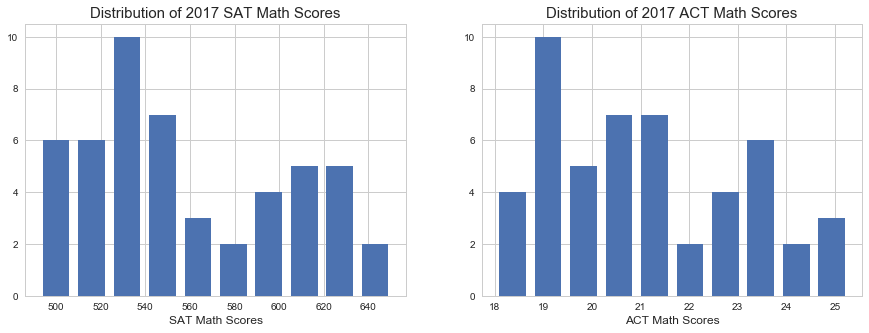

In [50]:
subplot_histograms(final, ['sat_2017_math','act_2017_math'], 
                   ['Distribution of 2017 SAT Math Scores',
                    'Distribution of 2017 ACT Math Scores',],
                   ['SAT Math Scores', 'ACT Math Scores'])

 - The shape of the histograms are slightly similar which indicates there may be a relationship between math scores for the SAT and ACT.

/Users/tofer/anaconda3/envs/dsi/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


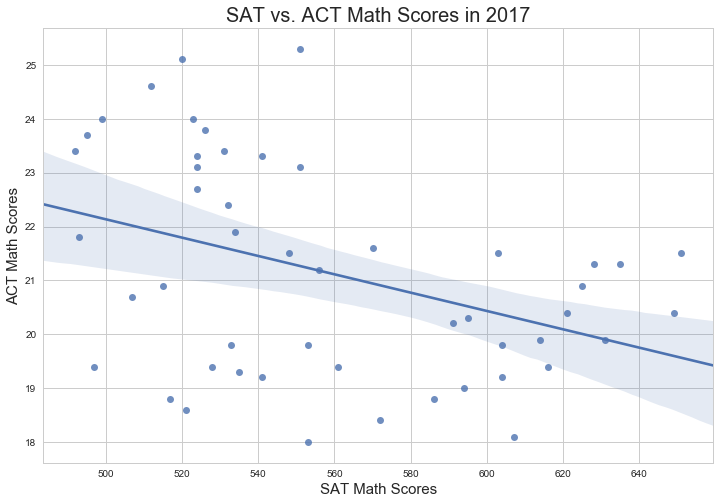

In [51]:
plt.figure(figsize = (12,8))
sns.regplot(final['sat_2017_math'],final['act_2017_math'])
plt.xlabel('SAT Math Scores', fontsize = 15)
plt.ylabel('ACT Math Scores', fontsize = 15)
plt.title("SAT vs. ACT Math Scores in 2017", fontsize = 20);

 - A glance at the scatter plot shows a somewhat negative correlation between the two scores.
 - We can make similar conclusions for the following in 2017 Verbal Scores and Total/Composite Scores.

### Distribution of Verbal Scores for SAT & ACT in 2017:


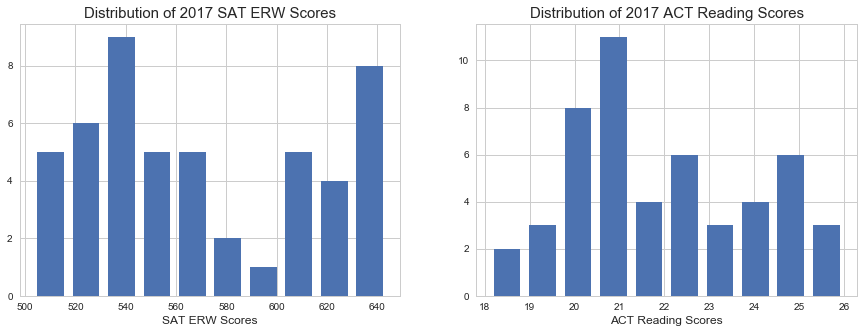

In [52]:
subplot_histograms(final, ['sat_2017_erw','act_2017_reading'], 
                   ['Distribution of 2017 SAT ERW Scores',
                    'Distribution of 2017 ACT Reading Scores',],
                   ['SAT ERW Scores', 'ACT Reading Scores'])

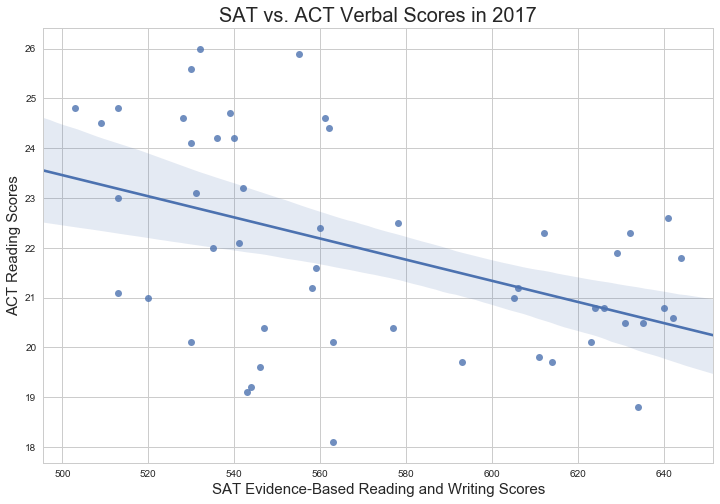

In [53]:
plt.figure(figsize = (12,8))
sns.regplot(final['sat_2017_erw'],final['act_2017_reading'])
plt.xlabel('SAT Evidence-Based Reading and Writing Scores', fontsize = 15)
plt.ylabel('ACT Reading Scores', fontsize = 15)
plt.title("SAT vs. ACT Verbal Scores in 2017", fontsize = 20);

#### Distribution of Verbal Scores for SAT & ACT in 2017:


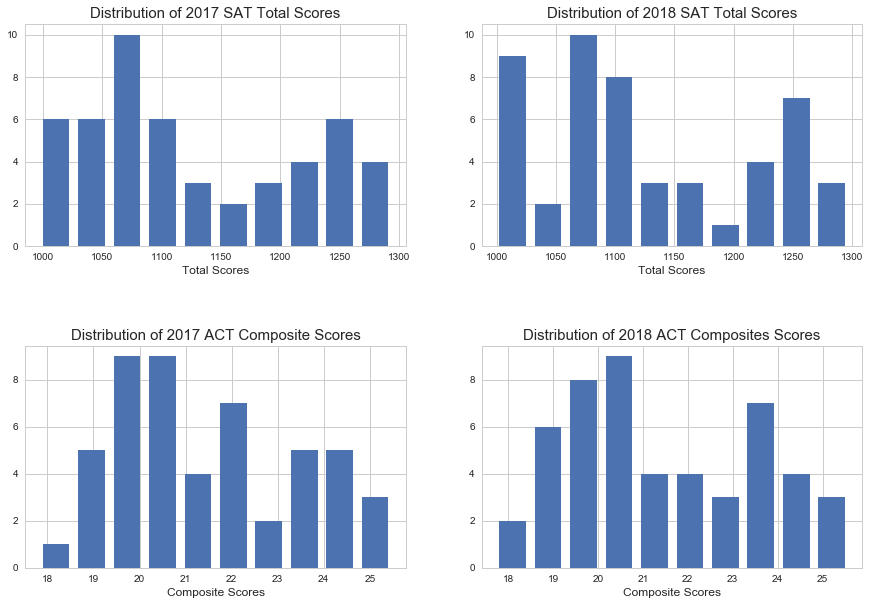

In [54]:
subplot_histograms(final, ['sat_2017_total', 'sat_2018_total', 'act_2017_composite','act_2018_composite'], 
                   ['Distribution of 2017 SAT Total Scores',
                    'Distribution of 2018 SAT Total Scores', 
                    'Distribution of 2017 ACT Composite Scores',
                    'Distribution of 2018 ACT Composites Scores'], 
                    ['Total Scores','Total Scores',
                   'Composite Scores', 'Composite Scores'])

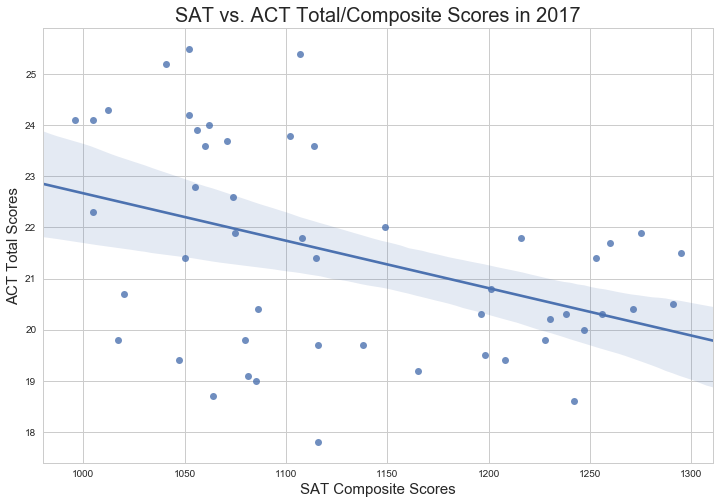

In [55]:
plt.figure(figsize = (12,8))
sns.regplot(final['sat_2017_total'],final['act_2017_composite'])
plt.xlabel('SAT Composite Scores', fontsize = 15)
plt.ylabel('ACT Total Scores', fontsize = 15)
plt.title("SAT vs. ACT Total/Composite Scores in 2017", fontsize = 20);

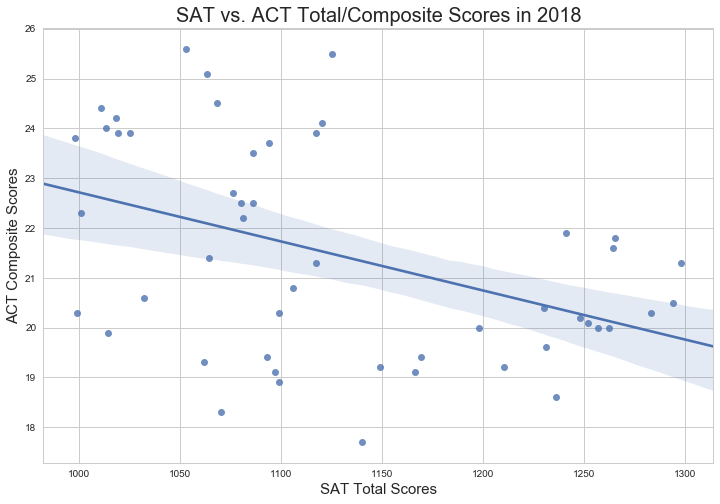

In [56]:
plt.figure(figsize = (12,8))
sns.regplot(final['sat_2018_total'],final['act_2018_composite'])
plt.xlabel('SAT Total Scores', fontsize = 15)
plt.ylabel('ACT Composite Scores', fontsize = 15)
plt.title("SAT vs. ACT Total/Composite Scores in 2018", fontsize = 20);

Because the Total/Composite Scores are directly related to the Math and Verbal Scores, we observe similar patterns in all sets of charts above. 

## Comparing Total/Composite Scores for the SAT and ACT between 2017 and 2018:

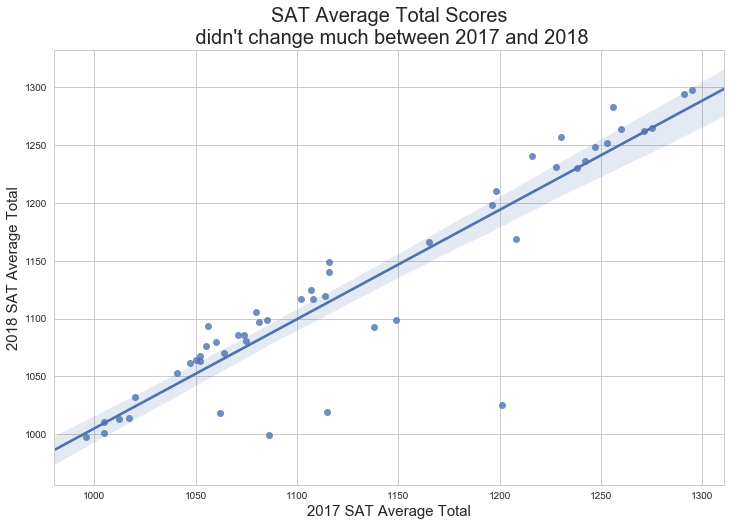

In [82]:
plt.figure(figsize = (12,8))
sns.regplot(final['sat_2017_total'],final['sat_2018_total'])
plt.xlabel('2017 SAT Average Total', fontsize = 15)
plt.ylabel('2018 SAT Average Total', fontsize = 15)
plt.title("SAT Average Total Scores\n didn't change much between 2017 and 2018", fontsize = 20);

 - Colorado is the distinct outlier in the lower right.  
 - We observe a noticeable dip in their total SAT score from 2017 to 2018.  
 - Otherwise, state total score averages tend not to change between years.

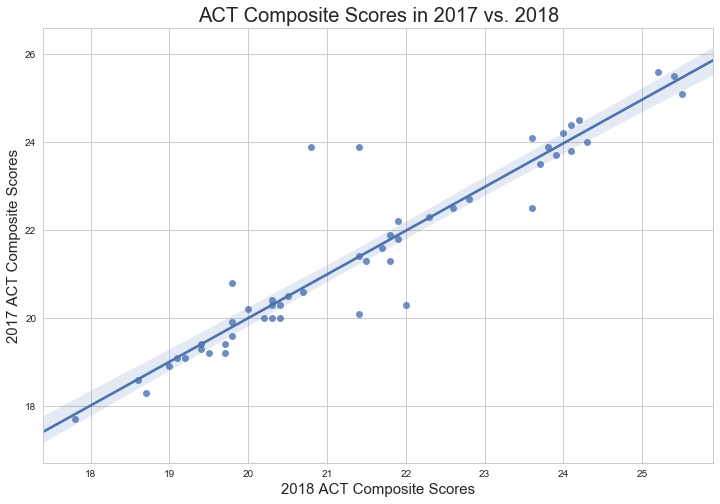

In [58]:
plt.figure(figsize = (12,8))
sns.regplot(final['act_2017_composite'],final['act_2018_composite'])
plt.ylabel('2017 ACT Composite Scores', fontsize = 15)
plt.xlabel('2018 ACT Composite Scores', fontsize = 15)
plt.title("ACT Composite Scores in 2017 vs. 2018", fontsize = 20);

 - We see a similar trend for ACT Composite Scores between 2017 and 2018. Composite Scores do not change too much between years. 

### Total/Composite Scores vs. Partipation Rates for the ACT and SAT in both 2017 and 2018:

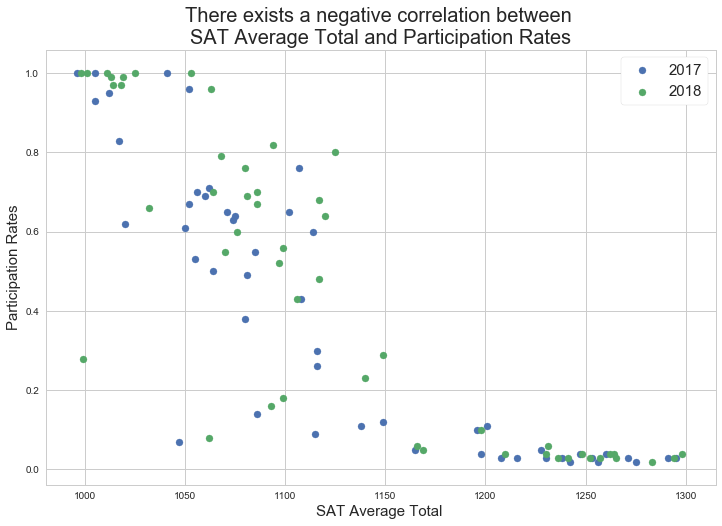

In [85]:
plt.figure(figsize = (12,8))
plt.scatter(final['sat_2017_total'],final['sat_2017_part'], label = '2017')
plt.scatter(final['sat_2018_total'],final['sat_2018_part'], label = '2018')
plt.xlabel('SAT Average Total ', fontsize = 15)
plt.ylabel('Participation Rates', fontsize = 15)
plt.title("There exists a negative correlation between \nSAT Average Total and Participation Rates", fontsize = 20);
plt.legend(loc='upper right', prop={'size': 15},framealpha=1, frameon=True, facecolor= 'white');


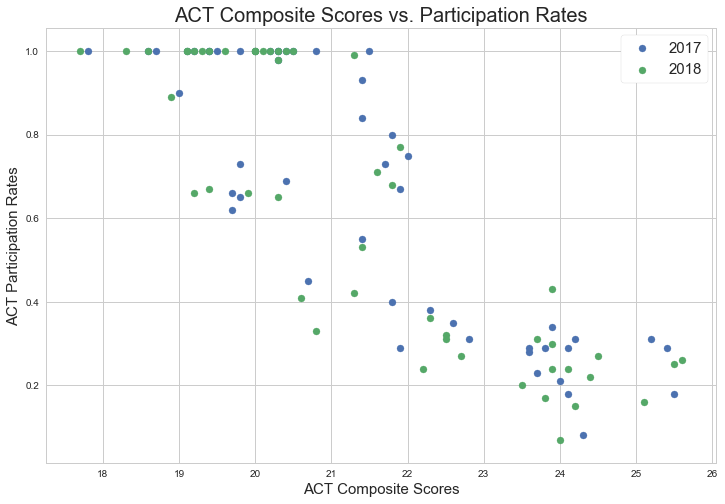

In [60]:
plt.figure(figsize = (12,8))
plt.scatter(final['act_2017_composite'],final['act_2017_part'], label = '2017')
plt.scatter(final['act_2018_composite'],final['act_2018_part'], label = '2018')
plt.xlabel('ACT Composite Scores', fontsize = 15)
plt.ylabel('ACT Participation Rates', fontsize = 15)
plt.title("ACT Composite Scores vs. Participation Rates", fontsize = 20);
plt.legend(loc='upper right', prop={'size': 15}, framealpha = 1, frameon = True, facecolor='white');

 - For both the SAT and ACT, we observe a negative correlation between the Total/Composite Scores and Participation Rates for both tests: States with higher participation rates tend to have lower overall average scores.

## Boxplots for Relative Data

/Users/tofer/anaconda3/envs/dsi/lib/python3.6/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)
/Users/tofer/anaconda3/envs/dsi/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


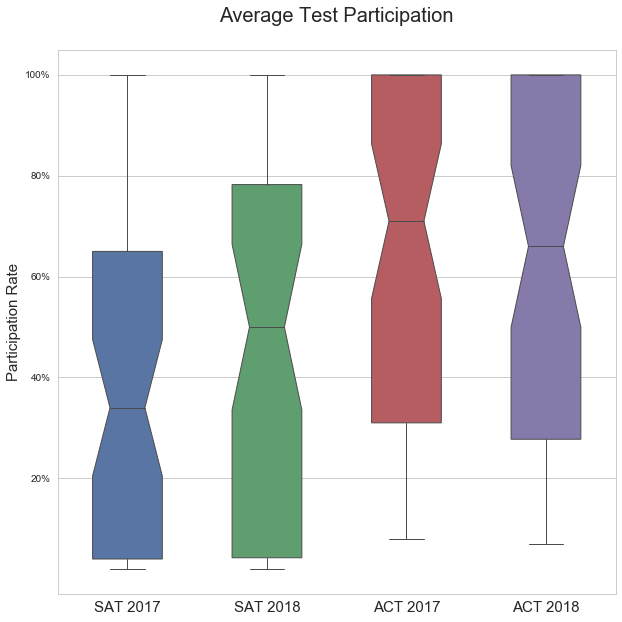

In [61]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
ax = sns.boxplot(final[['sat_2017_part','sat_2018_part','act_2017_part', 'act_2018_part']], 
                orient='v', fliersize=8, linewidth=1, notch=True, width=0.5, ax=ax)
ax.set_xticklabels(['SAT 2017','SAT 2018','ACT 2017','ACT 2018'], fontsize = 15)
ax.set_ylabel('Participation Rate', fontsize=15)
ax.set_title('Average Test Participation\n', fontsize=20)

plt.yticks(ticks = [.2,.4,.6,.8,1.0],labels = ['20%', '40%', '60%', '80%', '100%'], fontsize = 10)
plt.show();

 - SAT Average Participation Rate increased from 2017 to 2018. ACT Average Participation Rate decreased from 2017 to 2018. ACT Average Participation Rates are higher than SAT's overall.
 - Both tests share a wide range of participation rates, from close to 0% to 100%. 

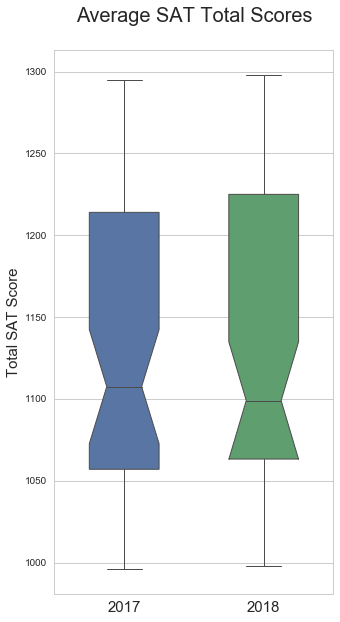

In [62]:
fig = plt.figure(figsize=(5,10))
ax = fig.gca()
ax = sns.boxplot(final[['sat_2017_total', 'sat_2018_total']], 
                orient='v', fliersize=8, linewidth=1, notch=True, width=0.5, ax=ax)
ax.set_xticklabels(['2017','2018'], fontsize = 15)
ax.set_ylabel('Total SAT Score', fontsize=15)
ax.set_title('Average SAT Total Scores\n', fontsize=20)

plt.show();

 - Total SAT Score average fell slightly between 2017 and 2018.  
 - Maximum score is 1300 and Minimum is 1000.

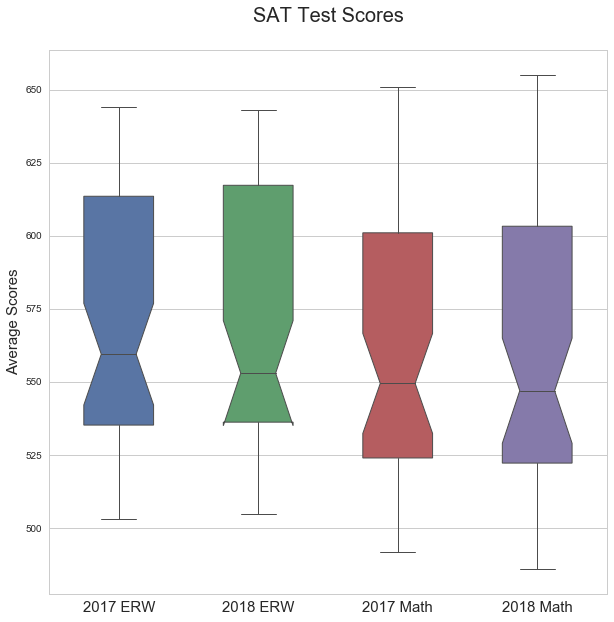

In [63]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
ax = sns.boxplot(final[['sat_2017_erw', 'sat_2018_erw', 
                        'sat_2017_math', 'sat_2018_math']], 
                orient='v', fliersize=8, linewidth=1, notch=True, width=0.5, ax=ax)
ax.set_xticklabels(['2017 ERW','2018 ERW','2017 Math','2018 Math'], fontsize = 15)
ax.set_ylabel('Average Scores', fontsize=15)
ax.set_title('SAT Test Scores\n', fontsize=20)

plt.show();

 - Average SAT ERW Score is slightly higher than Average SAT Math Score, but Average SAT Math Scores have higher variability. Just like the Total Score, both scores fell slightly between 2017 and 2018.

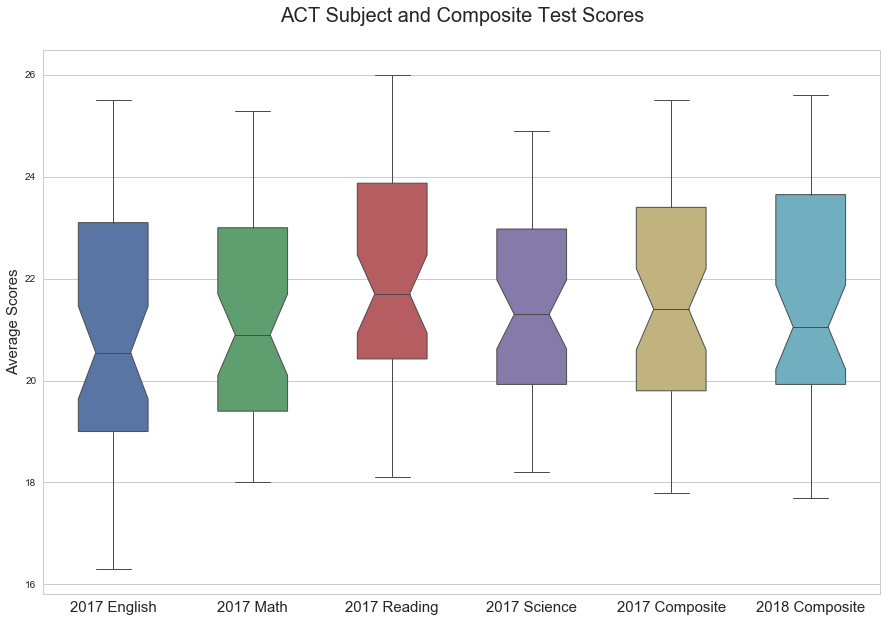

In [64]:
fig = plt.figure(figsize=(15,10))
ax = fig.gca()
ax = sns.boxplot(final[[ 'act_2017_english', 'act_2017_math','act_2017_reading', 
                        'act_2017_science', 'act_2017_composite','act_2018_composite']], 
                orient='v', fliersize=8, linewidth=1, notch=True, width=0.5, ax=ax)
ax.set_xticklabels(['2017 English','2017 Math','2017 Reading','2017 Science',
                    '2017 Composite','2018 Composite'], fontsize = 15)

ax.set_ylabel('Average Scores', fontsize=15)
ax.set_title('ACT Subject and Composite Test Scores\n', fontsize=20)

plt.show()

 - Average 2017 ACT English Scores has the highest variability (Nevada has a noticeably lower English Score). Average ACT Composite Scores have similar variability and range. 

### Additional Charts

In [65]:
# Creating Columns for Participation and Total/Composite Change Percentages between 2017 and 2018
final['act_part_change'] = (final['act_2018_part'] - final['act_2017_part']) / final['act_2018_part']
final['act_score_change'] = (final['act_2018_composite'] - final['act_2017_composite']) / final['act_2018_composite']
final['sat_part_change'] = (final['sat_2018_part'] - final['sat_2017_part']) / final['sat_2018_part']
final['sat_score_change'] = (final['sat_2018_total'] - final['sat_2017_total']) / final['sat_2018_total']

#### 2017 Subject Test Score Distributions:

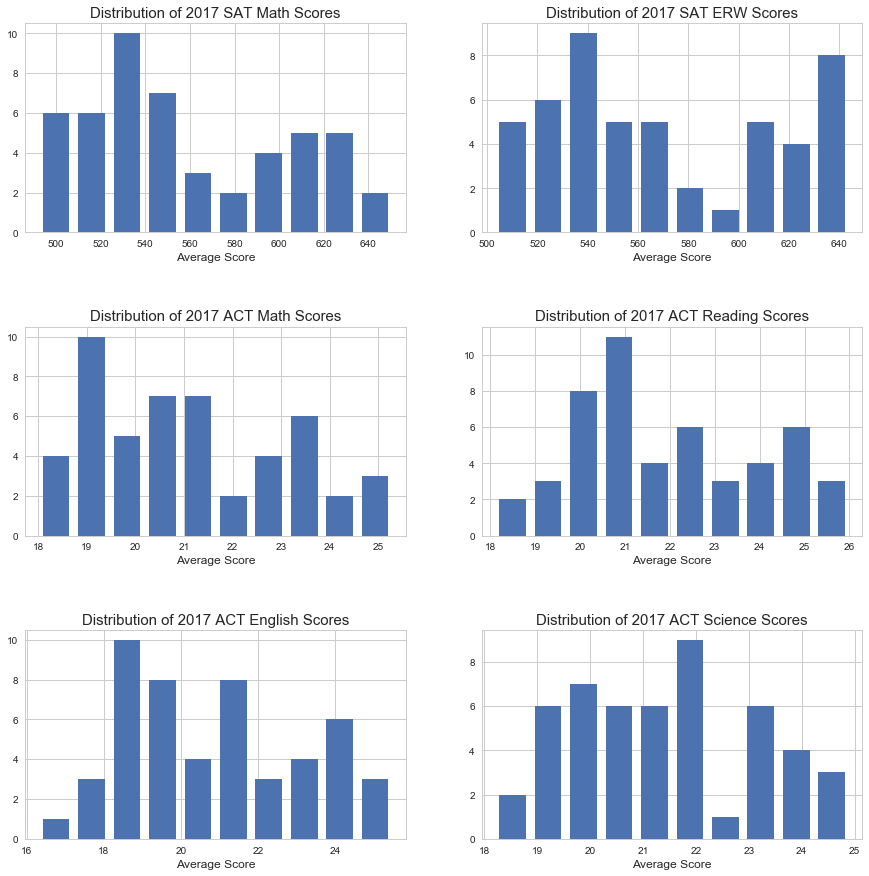

In [66]:
subplot_histograms(final, ['sat_2017_math', 'sat_2017_erw',
                           'act_2017_math', 'act_2017_reading',
                           'act_2017_english','act_2017_science'], 
                   ['Distribution of 2017 SAT Math Scores', 'Distribution of 2017 SAT ERW Scores',
                    'Distribution of 2017 ACT Math Scores', 'Distribution of 2017 ACT Reading Scores',
                    'Distribution of 2017 ACT English Scores','Distribution of 2017 ACT Science Scores'], 
                   ['Average Score' for i in range(0,6)])

In [67]:
final[['sat_2017_math', 'sat_2017_erw', 'act_2017_math', 
       'act_2017_reading','act_2017_english','act_2017_science']].describe().T

,count,mean,std,min,25%,50%,75%,max
sat_2017_math,50.0,558.660,45.839832,492.0,524.000,549.50,601.000,651.0
sat_2017_erw,50.0,570.860,44.385146,503.0,535.250,559.50,613.500,644.0
act_2017_math,50.0,21.136,1.973990,18.0,19.400,20.90,23.000,25.3
act_2017_reading,50.0,21.956,2.046317,18.1,20.425,21.70,23.875,26.0
act_2017_english,50.0,20.862,2.324307,16.3,19.000,20.55,23.100,25.5
act_2017_science,50.0,21.410,1.731962,18.2,19.925,21.30,22.975,24.9


 - These scores histograms and descriptive statistics exhibit nonnormality and high variability between states. 

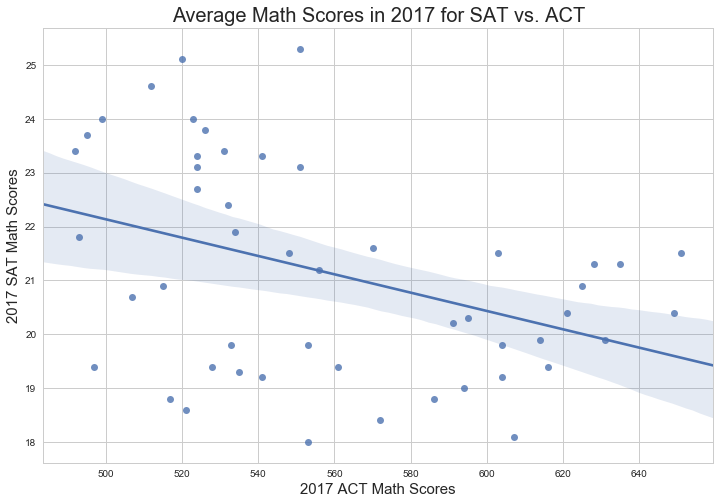

In [80]:
plt.figure(figsize = (12,8))
sns.regplot(final['sat_2017_math'],final['act_2017_math'])
plt.ylabel('2017 SAT Math Scores', fontsize = 15)
plt.xlabel('2017 ACT Math Scores', fontsize = 15)
plt.title("Average Math Scores in 2017 for SAT vs. ACT", fontsize = 20);

 - This chart implies a slightly negative correlation between ACT Math Scores and SAT Math Scores.

## Conclusions and Recommendations

When making inferences on a population with a sample, we need to assume the sample is normally distributed. We can't, however, determinedly say that distributions for all Total/Composite Scores, as well each 2017 Subject Scores, follow a Normal Distribution because our sample is not selected at random. This is due to the fact that our data measures preselected averages of each state's scores, as opposed to a sample of all individual scores at a national level. Additionally, an individual's SAT score is already "scaled" through an undisclosed process by the College Board known as "equating," which could affect the overall shape of the distribution of test scores ([source](https://blog.prepscholar.com/how-is-the-sat-scored-scoring-charts)). 

A normal distribution also depends on the assumption that the samples are independent and identically distributed. We know this not to be the case because some states mandate, or even pay for, high schoolers to take a specific college entrance exam ([source](https://blog.prepscholar.com/which-states-require-the-act-full-list-and-advice)). These [participation rate histograms](../images/figure_2.png) further reinforce the non-normality of these distributions. For that reason, it does not bode well to make statewide comparisons on participation rates between the SAT and ACT. On the other hand, we might infer that students who are required to take either the SAT or ACT in one state, are less inclined to take the other test voluntarily. Perhaps, in cases where a student chooses to take an optional exam (one that is not required in their state), they are likely to do better as they may have an extra incentive to do well (e.g. get accepted into their 'dream school').

For instance, the [scatterplot](../images/figure_1.png) measuring 2017 ACT Math Scores against 2017 SAT Math Scores in 2017 implies a negative relationship; the higher a student scores in Math on one exam, the worse they do in the other. This inference, however, goes against common expecatation: If the test is supposed to test a student's mathematical ability, shouldn't their scores in the same subject be relatively similar? It would be more insightful, in that instance, to measure the scores for those students who have taken both the SAT and ACT exams, then hypothesize a positive relationship between their two test scores. 

One trend that is clear is measured by Participation Rates vs. Total/Composite Scores for both the [SAT](../images/figure_4.png) and [ACT](../images/figure_3.png): States that have high participation rates for either the SAT or ACT, see lower than average overall test scores in their respective exams. This quality is most noticeable in the state of Colorado, when in 2018, the Department of Education enforced a mandate that students take the SAT (whereas the ACT test had been previously required since 2001) ([source](https://chalkbeat.org/posts/co/2015/12/23/goodbye-act-hello-sat-a-significant-change-for-colorado-high-schoolers/)). This legislation accounts for the drastic change in SAT participation rates from 11% to 100% and, subsequently, the decline in its average total SAT score, from 1201 to 1025, a -17% change. A similar phenomenon occurs in Illinois ([source](https://www.chicagotribune.com/news/ct-illinois-chooses-sat-met-20160211-story.html)), where SAT participation rates went from 9% in 2017 to 99% in 2018, and therefore a decline in average total SAT scores (-9%). Furthermore, the state of Delaware, where its SAT participation rate was 100% in both 2017 and 2018, maintained the lowest average total SAT scores in both years.

In order to increase nationwide participation, the College Board should engage states, [in a variety of ways](https://www.hanoverresearch.com/media/Best-Practices-to-Increase-SAT-Participation-1.pdf), where participation rates for the SAT are relatively low, but also where the ACT is not already required: Georgia, Oregon, California, Indiana, Alaska, etc. When participation rates for these states inevitably rise, the College Board can also expect these state's average total scores to decline. 